# ***Image Segmentation Using K-means and DBSCAN: Generic Approach***.<br>
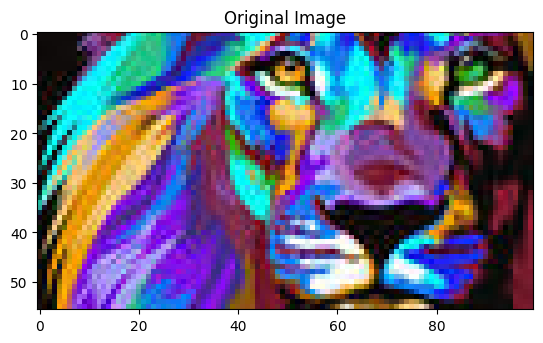<br>
K-means and DBSCAN are clustering algorithms, which we apply for color segmentation in images.<br>

### ***k-means***
tries to find a color representatives for a number of classes given, i.e., most average color for each class, which is most similar to the colors within the class but as different as possible from colors in other classes.

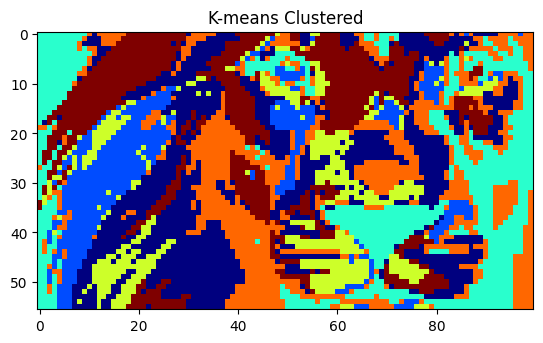

K-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. K-means clustering algorithm works in three steps. Let’s see what are these three steps.

    Select the k values.
    Initialize the centroids.
    Select the group and find the average.


### ***DBSCAN*** 
is so called density-based clustering algorithm, which tries to group similar colors into different classes based on how densely they are positioned.

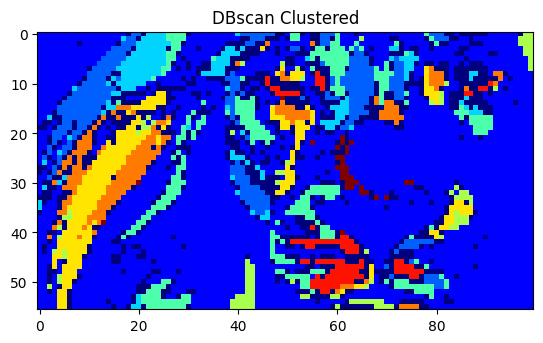

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

# Files
   `clustering_algorithms_generic.py` - Container for Kmeans and DBScan.<br>
   `Images/x.jpg` - Images used for segmentation.<br>
   `Iris.csv` - Verification Purpose the clustering methods works with any data

# Dependencies
   All packages/libraries should be included in Python 3.9.13

# Format 

   All Data get Flattened/Reshaped and is fed into the clustering module.

# Copyright
   All the images i  `Images/*` were taken from internet and therefore belong to their respective owners.<br>
   Algorithms were not invented by me, I merely just implemented them.  
   
# Some Observations.
   Works well with small images, and does cluster other type of data.
    

Please go through `README.md` for understanding requirements and execution flow.<br>

## Step 1: Loading the Image

**Note**: Image feeding is possible with 2 methods in-program feeding and if using google colab file upload is also a given, choose based on context. Purpose it to feed `image_path` with relevant image location datum, Edit `image_path` with required image files if using in-program feeding.<br>

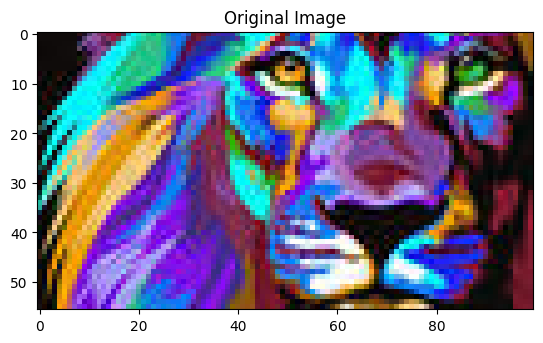

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import clustering_algorithms_generic
import time
import sys
import math
import cv2

#from google.colab import files #use this if using google colab.

# if in-program feeding.
image_path="Images//face (2).jpg"

"""
# if Using Colab | Comment in-app browsing
uploaded =files.upload()
image_path = list(uploaded.keys())[0]
"""

# Display the image: using in different contexts
def Display(Image,Alg):
    %matplotlib inline
    plt.title(Alg)
    plt.imshow(np.asarray(Image))
    
image = cv2.imread(image_path)
h,w,d = image.shape


# Display the Original image in notebook:
Display(image,"Original Image")

## Step 2: Flatten or reshape the image for clustering 


In [7]:
height,width,depth = image.shape
new_shape= height*width
image_flattened = np.reshape(image,(new_shape,depth))

## Step 3: Perform clustering on the flattened vector

Using the clustering_algorithms methods dbscan and kmeans.
both methods taking input flattened vectors and respective hyperparameters.

User is free to perform which clustering he requires by default performing both.

In [8]:
start_time = time.time()
dbscan_clusters = clustering_algorithms_generic.dbscan(image_flattened, 16,56)
print("Time taken for DBScan "+str(round(time.time() - start_time))+" Seconds")
start_time = time.time()
kmeans_clusters = clustering_algorithms_generic.run_kmeans(image_flattened, 6)
print("Time taken for Kmeans "+str(round(time.time() - start_time))+" Seconds")

Time taken for DBScan 1 Seconds
Time taken for Kmeans 0 Seconds


## Step 4: Display the Segmented Images

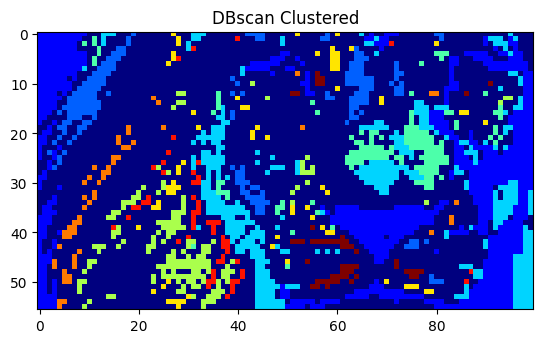

In [9]:
#DBScan Image
dbscan_clustered_image = np.reshape(dbscan_clusters,(height,width))
kmeans_clustered_image = np.reshape(kmeans_clusters,(height,width))
plt.title('DBscan Clustered')
plt.imshow(dbscan_clustered_image, cmap='jet') # interpolation='none'

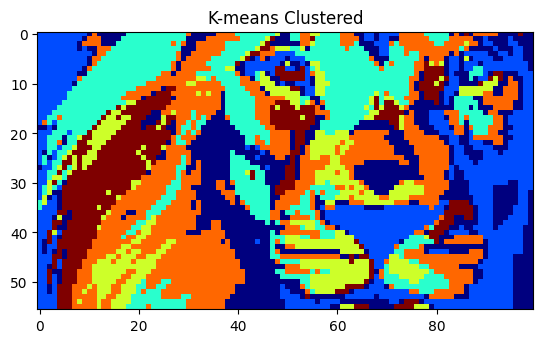

In [10]:
#Kmeans Image
plt.title('K-means Clustered')
plt.imshow(kmeans_clustered_image, cmap='jet') # interpolation='none'

**Verifying the same for data other than image data**

In [11]:
# for other data
import pandas as pd
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Clustering data using K means

#Selecting necessary columns
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
kmeans_clusters = clustering_algorithms_generic.run_kmeans(image_flattened, 3)
kmeans_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [13]:
# Clustering data using K means

#Selecting necessary columns
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
dbscan_clusters = clustering_algorithms_generic.dbscan(X, 18,25)
dbscan_clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])